In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Zomato_data.csv')

In [3]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
df.shape

(148, 7)

In [5]:
## convert the data type of rate 
def HandleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
df['rate']=df['rate'].apply(HandleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [6]:
## check if any null value is present in any col
pd.isnull(df).sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.8+ KB


### Type of Restaurant most people order from ###

In [8]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


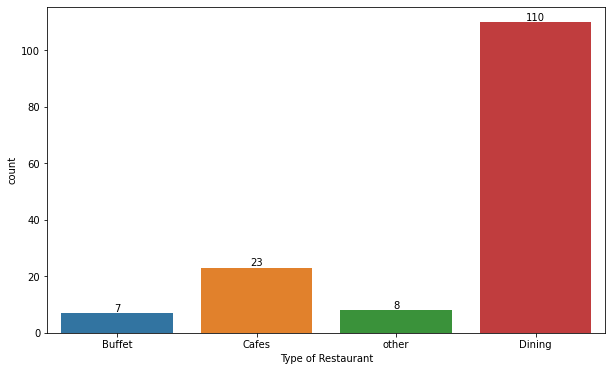

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
cp = sns.countplot(x='listed_in(type)',data=df)
plt.xlabel("Type of Restaurant")

## next lines to show count and label
for bars in cp.containers:
    cp.bar_label(bars)

***Conclusion - Majority of the restaurant falls in dining category***


### Votes of each type of Restaurant ###

In [10]:
gd = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': gd})
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Number of Votes')

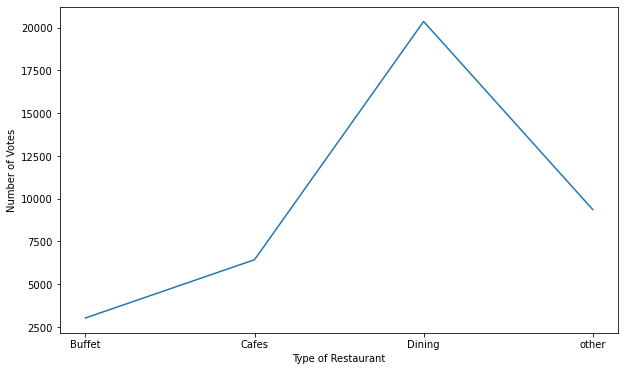

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result)
plt.xlabel('Type of Restaurant')
plt.ylabel('Number of Votes')

***Conclusion - Dining restaurants have received maximum no of votes***

### Ratings received by majority of restaurants ###

<AxesSubplot:xlabel='rate', ylabel='Count'>

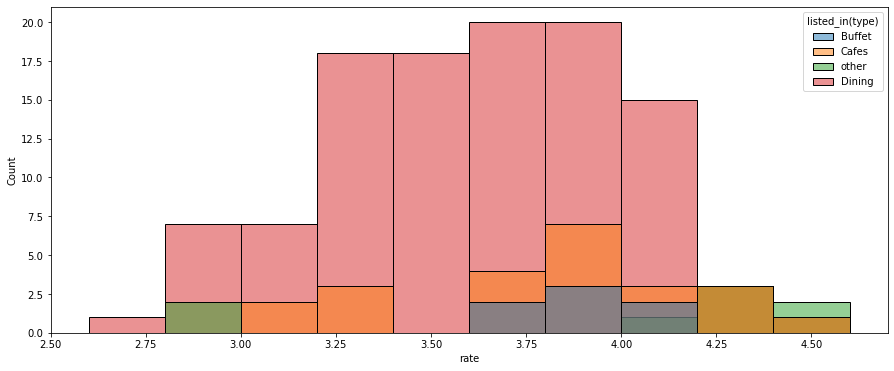

In [12]:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(data=df, x='rate',bins=10,hue='listed_in(type)')


***Conclusion - Most of the ratings received is between 3.5 to 4***

### Average order spending by couples ###

In [13]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

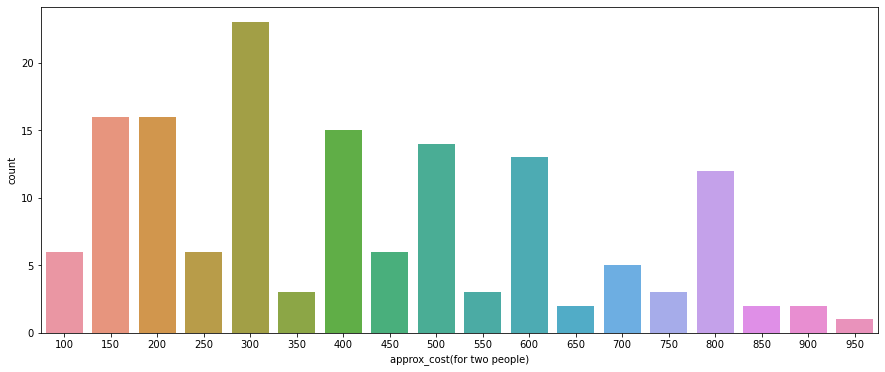

In [14]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='approx_cost(for two people)',data=df)

***Conclusion - Most couple orders food having rate around Rs300***

### Ratings on each mode (Online/Offline) ###

<AxesSubplot:xlabel='online_order', ylabel='rate'>

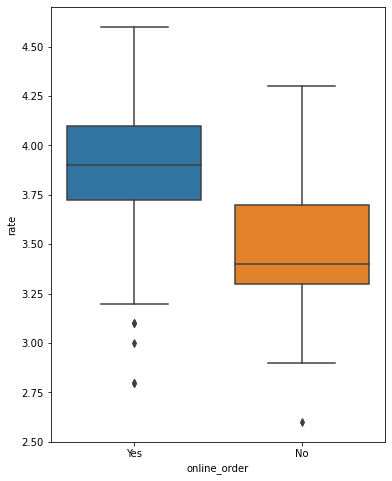

In [15]:
fig, ax = plt.subplots(figsize=(6,8))
sns.boxplot(x='online_order',y='rate',data=df)

***Conclusion - It is observed that people give better rating on online order than offline***

### Restaurant types and their sales on each mode ###

In [16]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [17]:
pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
pivot_table

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


<AxesSubplot:xlabel='online_order', ylabel='listed_in(type)'>

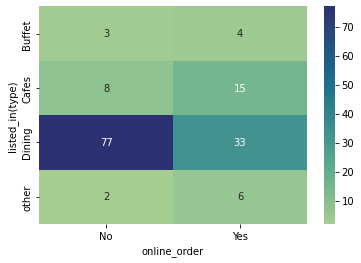

In [18]:
sns.heatmap(pivot_table,annot=True,cmap='crest')

***Conclusion - People prefer dining in offline, cafes in online, buffets in both***